# Week 9 Videos

In [1]:
import numpy as np
import pandas as pd
import altair as alt

## Using PolynomialFeatures for polynomial regression

<iframe width="560" height="315" src="https://www.youtube.com/embed/34MkFM0yD00" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

* Find the best degree 10 polynomial fit to the following data.

In [2]:
df_full = pd.read_csv("sim_data.csv")

In [3]:
c = alt.Chart(df_full).mark_circle().encode(
    x="x",
    y=alt.Y("y", scale=alt.Scale(domain=(-100,200)))
)

c

alt.Chart(...)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
poly = PolynomialFeatures(degree=3)

In [11]:
poly.fit([1,2,3])

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
poly.fit([[1],[2],[3]])

PolynomialFeatures(degree=3)

In [13]:
poly.transform([[1],[2],[3]])

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [15]:
poly = PolynomialFeatures(degree=10, include_bias=False)

In [16]:
poly.fit(df_full[["x"]])

PolynomialFeatures(degree=10, include_bias=False)

In [18]:
poly_output = poly.transform(df_full[["x"]])

In [19]:
poly_output.shape

(1000, 10)

In [20]:
df_full.shape

(1000, 2)

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(poly_output, df_full["y"])

LinearRegression()

In [23]:
df_full["y_pred"] = reg.predict(poly_output)

In [24]:
c1 = alt.Chart(df_full).mark_line(color="red").encode(
    x="x",
    y=alt.Y("y_pred", scale=alt.Scale(domain=(-100,200)))
)

c+c1

alt.LayerChart(...)

In [25]:
reg.coef_

array([ 1.93921635e+00,  6.63730004e-01,  4.19627174e-01,  1.05234312e-01,
       -2.52265950e-02, -3.66440336e-03,  5.56502040e-04,  5.11511273e-05,
       -4.08015016e-06, -2.40595561e-07])

## Simplifying the workflow using Pipeline

<iframe width="560" height="315" src="https://www.youtube.com/embed/gPLioOkVz1I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=10, include_bias=False)),
        ("reg" , LinearRegression())
    ]
)

In [36]:
pipe.fit(df_full[["x"]], df_full["y"])

Pipeline(steps=[('poly', PolynomialFeatures(degree=10, include_bias=False)),
                ('reg', LinearRegression())])

In [38]:
pipe.predict(df_full[["x"]])[:10]

array([-16.61185077,  48.44066523,  48.35605204, -12.05378022,
       -23.57571082,  49.62925485,   8.4672055 ,  20.5486394 ,
        68.87074109,   4.69566674])

## Evidence of overfitting 1

<iframe width="560" height="315" src="https://www.youtube.com/embed/mbD_kOt-qxQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [39]:
results = []

for i in range(8):
    df = df_full.sample(50, random_state=i)
    pipe.fit(df[["x"]], df["y"])
    df_plot = pd.DataFrame({"x": np.arange(-8,8,0.1)})
    df_plot["y_pred"] = pipe.predict(df_plot[["x"]])
    df_plot["random_state"] = i
    results.append(df_plot)

In [40]:
results[3]

,x,y_pred,random_state
0,-8.0,154.784602,3
1,-7.9,114.177796,3
2,-7.8,82.397125,3
3,-7.7,57.952573,3
4,-7.6,39.551362,3
...,...,...,...
155,7.5,120.290365,3
156,7.6,119.430406,3
157,7.7,118.994307,3
158,7.8,119.416480,3


In [41]:
df_plot2 = pd.concat(results, axis=0)

In [43]:
c1 = alt.Chart(df_plot2).mark_line().encode(
    x="x",
    y=alt.Y("y_pred", scale=alt.Scale(domain=(-100,200))),
    color="random_state:N"
)

c+c1

alt.LayerChart(...)

## Evidence of overfitting 2

<iframe width="560" height="315" src="https://www.youtube.com/embed/iUy9rnLdAv8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_full[["x"]], df_full["y"], random_state=0, train_size=50)

train_error = []
test_error = []

for d in range(1,30):
    pipe = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=d, include_bias=False)),
            ("reg" , LinearRegression())
        ]
    )
    pipe.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, pipe.predict(X_train)))
    test_error.append(mean_squared_error(y_test, pipe.predict(X_test)))

In [62]:
train_error[:5]

[1298.9412892405774,
 877.1041647747753,
 870.5283022206671,
 867.9213135311684,
 865.1010263394086]

In [63]:
test_error[:5]

[2142.5158992895012,
 1208.1193683613008,
 1200.5113425429654,
 1197.4353815725306,
 1187.2768345993675]

In [59]:
from matplotlib import pyplot as plt

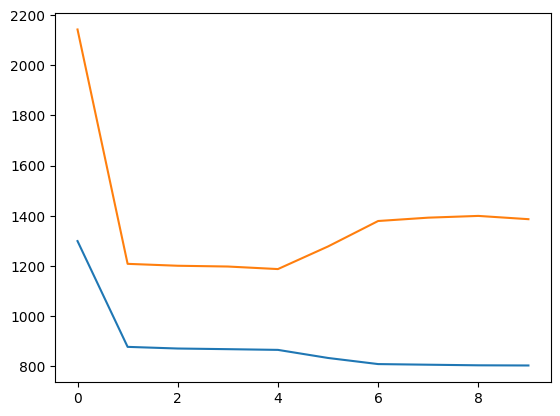

In [66]:
fig, ax = plt.subplots()
ax.plot(train_error[:10])
ax.plot(test_error[:10])

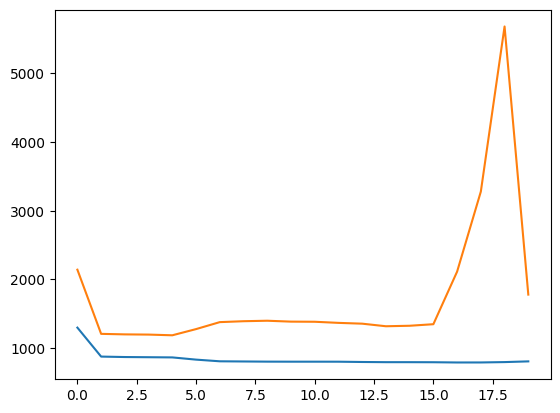

In [65]:
fig, ax = plt.subplots()
ax.plot(train_error[:20])
ax.plot(test_error[:20])

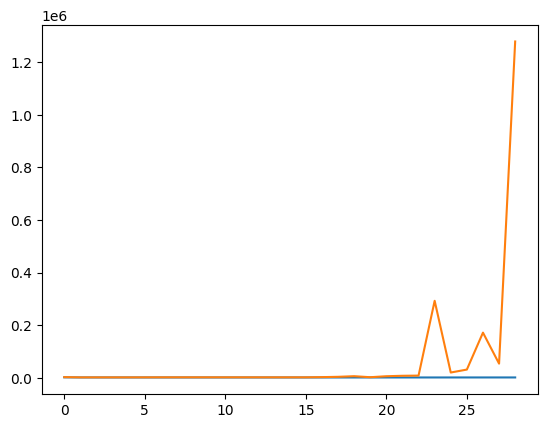

In [67]:
fig, ax = plt.subplots()
ax.plot(train_error)
ax.plot(test_error)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6ae5fdc-b83a-492a-b035-9a1ea5bbe43f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>